# Hotel Reservation Project 

# Introduction :

### In the dynamic landscape of the hospitality industry, one of the significant challenges faced by hoteliers is managing reservation cancellations effectively. Cancellations not only impact revenue but also pose operational challenges in resource allocation and inventory management. The Hotel Reservation Project aims to leverage machine learning techniques to predict reservation cancellations accurately and develop strategies to minimize their impact on hotel operations.¶

# Problem Statement:
### Predicting cancellation of hotel reservation

# Objectives :
### Predictive Modeling:Develop machine learning models to forecast reservation cancellations based on historical booking data and guest behavior patterns. This project is to develop a machine learning model capable of accurately predicting hotel reservation cancellations. By leveraging historical booking data and relevant features, the model aims to forecast cancellations with high precision, enabling hotel management to implement targeted strategies to minimize revenue loss and optimize resource allocation.

# Target Variable :
### booking_status

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Importing the dataset

In [2]:
bk = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\python\booking.csv")

### Dataset Size

In [3]:
bk.shape

(36285, 17)

### Checking for the missing values

In [4]:
bk.isnull().sum()[bk.isnull().sum() > 0]

Series([], dtype: int64)

### No missing values detected in the dataset

### Dropping the unwanted columns

In [5]:
bk = bk.drop(['Booking_ID','date_of_reservation'],axis=1)

### Dataset Overview

In [6]:
bk.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled


# EDA (Exploratory Data Analysis)

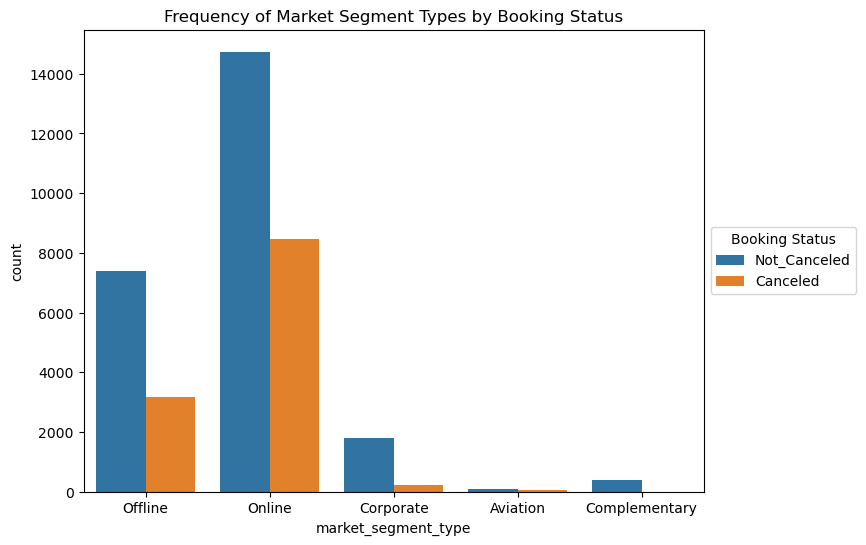

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bk, x="market_segment_type", hue="booking_status")
plt.title('Frequency of Market Segment Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

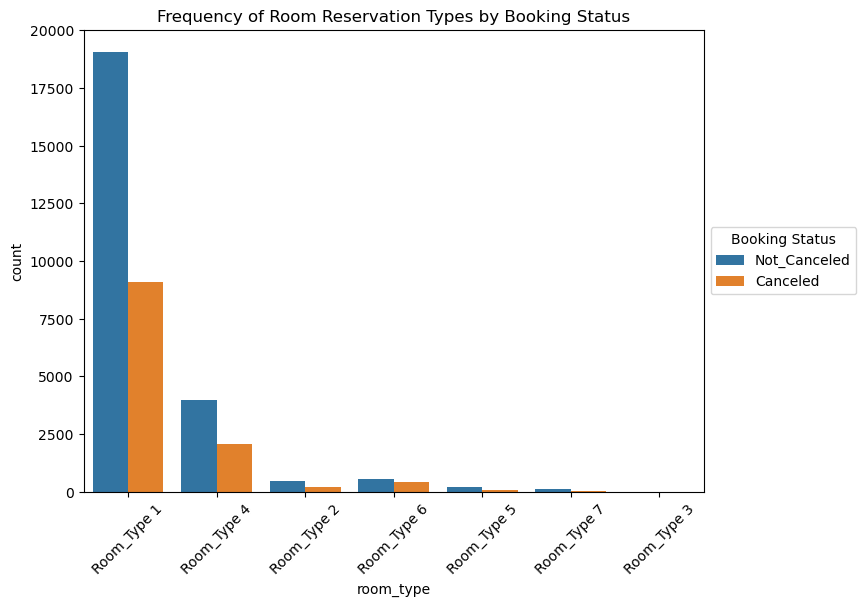

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(bk, x="room_type", hue="booking_status")
plt.title('Frequency of Room Reservation Types by Booking Status')
plt.legend(title="Booking Status", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45)
plt.show()

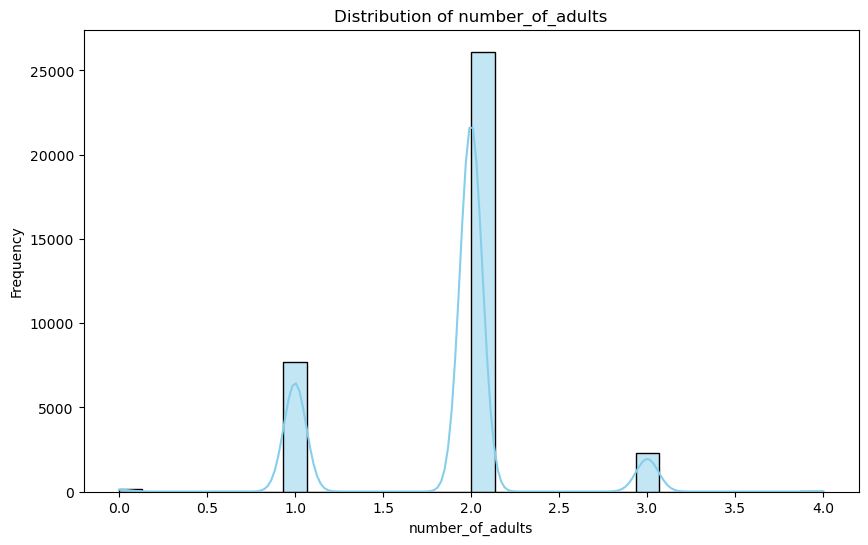

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(bk.number_of_adults, kde=True, bins=30, color='skyblue')
plt.title(f'Distribution of number_of_adults')
plt.xlabel('number_of_adults')
plt.ylabel('Frequency')
plt.show();

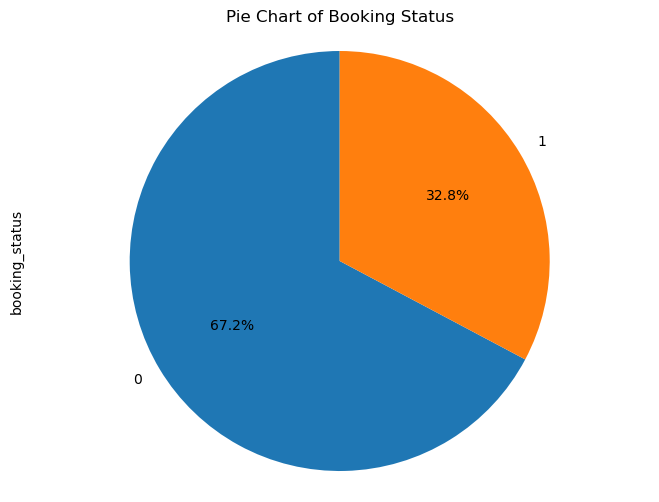

In [80]:
plt.figure(figsize=(8, 6))
bk.booking_status.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of Booking Status')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

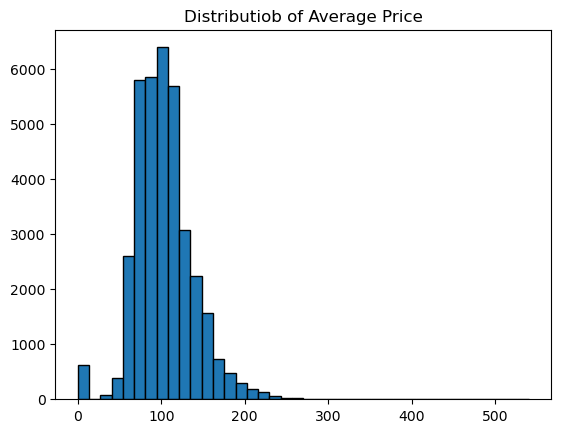

In [163]:
plt.hist(bk.average_price, bins  = 40,edgecolor = 'black')
plt.title('Distributiob of Average Price');

In [83]:
bk.average_price.skew()

0.6671859329192257

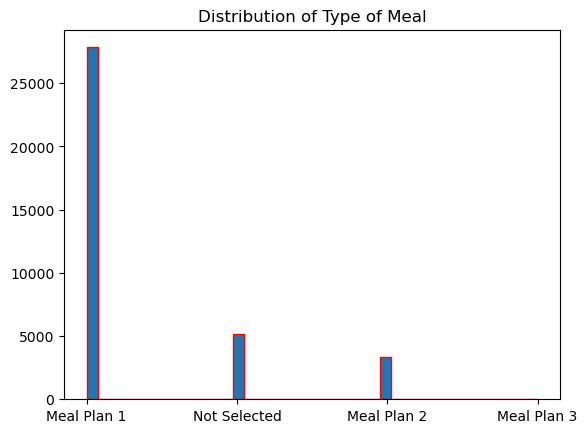

In [12]:
plt.hist(bk.type_of_meal,bins = 40,edgecolor = 'red')
plt.title('Distribution of Type of Meal');

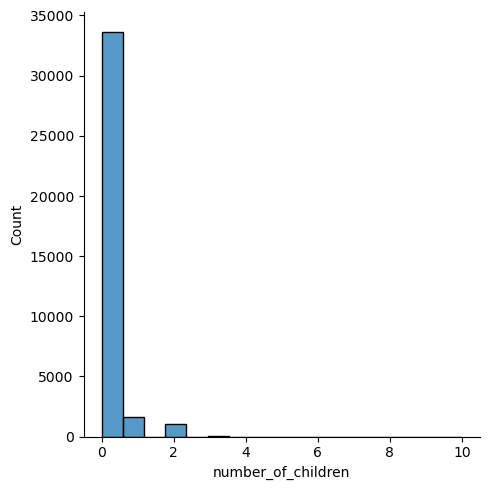

In [14]:
sns.displot(bk.number_of_children);

# Data Cleaning: Preparing the Dataset for Analysis

### Checking for the categoric Columns

In [15]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_adults          36285 non-null  int64  
 1   number_of_children        36285 non-null  int64  
 2   number_of_weekend_nights  36285 non-null  int64  
 3   number_of_week_nights     36285 non-null  int64  
 4   type_of_meal              36285 non-null  object 
 5   car_parking_space         36285 non-null  int64  
 6   room_type                 36285 non-null  object 
 7   lead_time                 36285 non-null  int64  
 8   market_segment_type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average_price             36285 non-null  float64
 13  special_requests          36285 non-null  int64  
 14  bookin

### CONVERTING THE CATEGORIC COLUMNS TO NUMERIC

In [16]:
le=LabelEncoder()
bk.type_of_meal      = le.fit_transform(bk.type_of_meal)
bk.room_type      = le.fit_transform(bk.room_type)
bk.market_segment_type = le.fit_transform(bk.market_segment_type)
bk.booking_status.replace({'Not_Canceled':0,'Canceled' :1},inplace = True)   

### Checking if all the columns are in numeric format

In [17]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_adults          36285 non-null  int64  
 1   number_of_children        36285 non-null  int64  
 2   number_of_weekend_nights  36285 non-null  int64  
 3   number_of_week_nights     36285 non-null  int64  
 4   type_of_meal              36285 non-null  int32  
 5   car_parking_space         36285 non-null  int64  
 6   room_type                 36285 non-null  int32  
 7   lead_time                 36285 non-null  int64  
 8   market_segment_type       36285 non-null  int32  
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average_price             36285 non-null  float64
 13  special_requests          36285 non-null  int64  
 14  bookin

### Outlier Detection and Removal

In [18]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of Outliers removed -->", df.shape[0] - df1.shape[0])

In [19]:
remove_outliers(bk,'booking_status',1)

(24396, 15)
Number of Outliers removed --> 11889


### Checking the significant and non-significant variable by using chi2_test

In [86]:
i = 0
pvalues = 0.05
for i in bk.columns:
    a = pd.crosstab(bk.booking_status,bk[i])
    b = chi2_contingency(a)[1]         #  [1] ---> it will select the p value
    if b <= pvalues:
        print(i)
        print(b,"Reject Ho,There is relationship b/w two variables")
    else:
        print(i)
        print(b,"Retain Ho,There is no relationship b/w two variables")

number_of_adults
5.935135167830601e-72 Reject Ho,There is relationship b/w two variables
number_of_children
1.02506194313572e-10 Reject Ho,There is relationship b/w two variables
number_of_weekend_nights
9.525289260872017e-44 Reject Ho,There is relationship b/w two variables
number_of_week_nights
1.3258256344032967e-81 Reject Ho,There is relationship b/w two variables
type_of_meal
3.4179336018719243e-60 Reject Ho,There is relationship b/w two variables
car_parking_space
2.5011863529534376e-60 Reject Ho,There is relationship b/w two variables
room_type
1.6769123592416874e-10 Reject Ho,There is relationship b/w two variables
lead_time
0.0 Reject Ho,There is relationship b/w two variables
market_segment_type
6.246509234218631e-175 Reject Ho,There is relationship b/w two variables
repeated
1.6948486218139465e-92 Reject Ho,There is relationship b/w two variables
P-C
3.326190719801652e-26 Reject Ho,There is relationship b/w two variables
P-not-C
1.1547539121828176e-49 Reject Ho,There is rela

### Data Sampling : Splitting into train and test

In [23]:
X = bk.drop('booking_status', axis=1)   
y = bk['booking_status']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

# Model Training

### Logicstic Regression Model

In [128]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

LogisticRegression()

In [129]:
pred_test_logreg =logreg.predict(X_test_scaled)

In [130]:
from sklearn.metrics import confusion_matrix

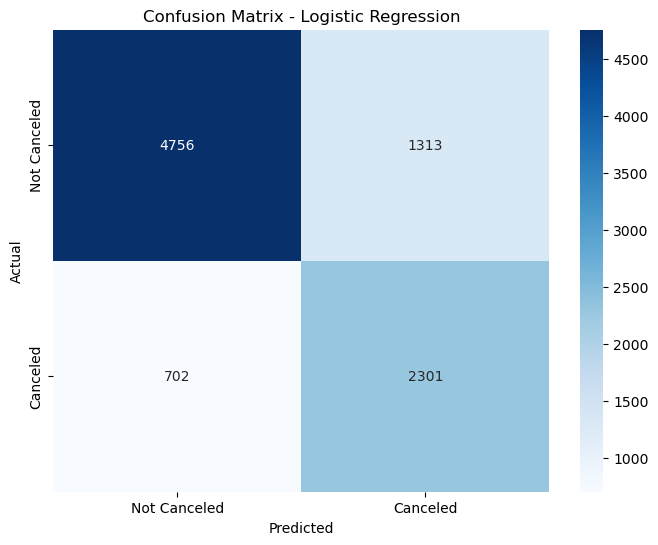

In [131]:
conf_matrix_rf = confusion_matrix(y_test, pred_test_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [132]:
from sklearn.metrics import accuracy_score ,recall_score , precision_score ,f1_score

In [133]:
log_acc=accuracy_score(y_test , pred_test_logreg)
log_acc

0.7778880070546738

In [134]:
log_recall=recall_score(y_test, pred_test_logreg)
log_recall

0.7662337662337663

In [135]:
log_precision=precision_score(y_test , pred_test_logreg)
log_precision

0.6366906474820144

In [136]:
log_f1=f1_score(y_test , pred_test_logreg)
log_f1

0.6954813359528488

### DECISION TREE

In [137]:
dt = DecisionTreeClassifier()

In [138]:
dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [139]:
pred_dt_bk = dt.predict(X_test_scaled)

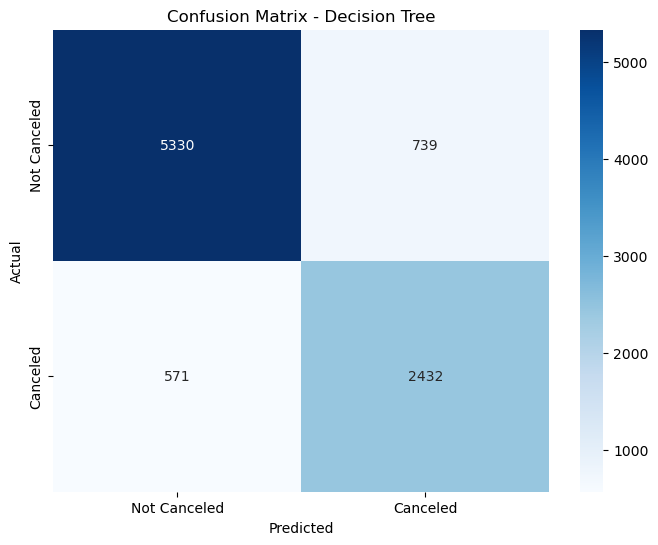

In [140]:
conf_matrix_rf = confusion_matrix(y_test, pred_dt_bk)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [141]:
dt_acc=accuracy_score(y_test, pred_dt_bk)
dt_acc

0.8555996472663139

In [142]:
dt_recall=recall_score(y_test, pred_dt_bk)
dt_recall

0.8098568098568099

In [143]:
dt_precision=precision_score(y_test, pred_dt_bk)
dt_precision

0.7669504888047934

In [144]:
dt_f1=f1_score(y_test, pred_dt_bk)
dt_f1

0.7878198898607062

### RANDOM FOREST

In [212]:
rfc = RandomForestClassifier()

In [213]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [214]:
pred_rfc_bk = rfc.predict((X_test_scaled))

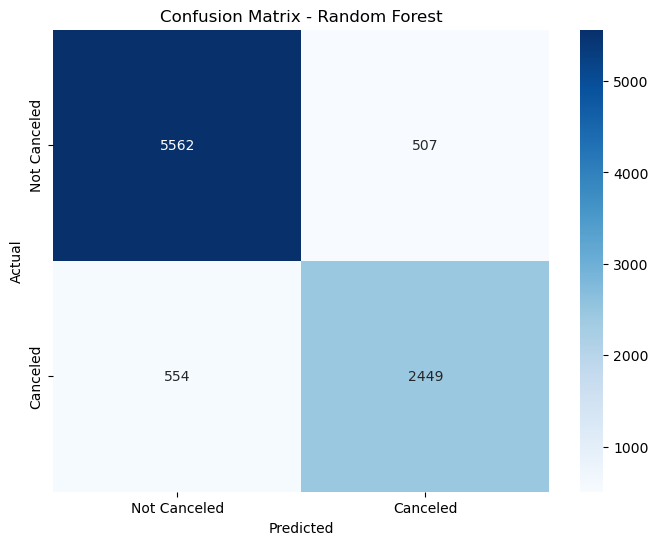

In [215]:
conf_matrix_rf = confusion_matrix(y_test, pred_rfc_bk)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [216]:
rfc_acc=accuracy_score(y_test, pred_rfc_bk)
rfc_acc

0.8830467372134039

In [217]:
rfc_recall = recall_score(y_test, pred_rfc_bk)
rfc_recall

0.8155178155178155

In [218]:
rfc_precision=precision_score(y_test, pred_rfc_bk)
rfc_precision

0.8284844384303113

In [219]:
rfc_f1=f1_score(y_test, pred_rfc_bk)
rfc_f1

0.8219499916093304

### K Nearest Neighbors Classifier

In [153]:
knn = KNeighborsClassifier(n_neighbors=15)  

In [154]:
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=15)

In [155]:
pred_knn_bk = knn.predict((X_test_scaled))

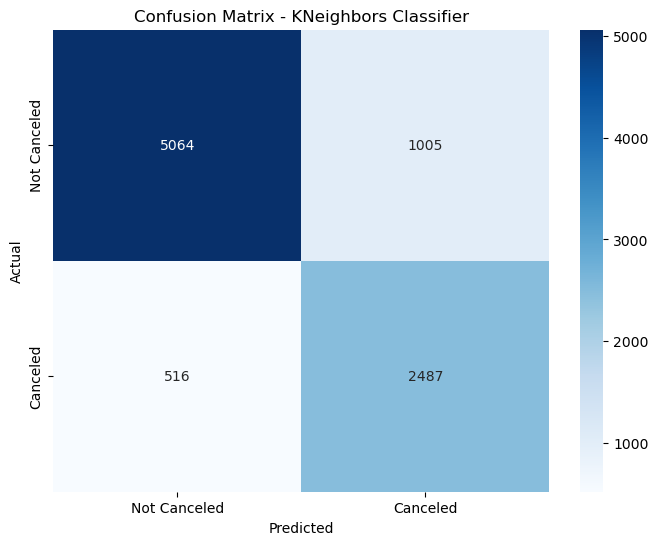

In [156]:
conf_matrix_rf = confusion_matrix(y_test, pred_knn_bk)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - KNeighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [157]:
knn_acc=accuracy_score(y_test, pred_knn_bk)
knn_acc

0.8323412698412699

In [158]:
knn_recall=recall_score(y_test, pred_knn_bk)
knn_recall

0.8281718281718282

In [159]:
knn_precision=precision_score(y_test, pred_knn_bk)
knn_precision

0.7121993127147767

In [160]:
knn_f1=f1_score(y_test, pred_knn_bk)
knn_f1

0.7658198614318706

### Create a DataFrame to store evaluation metrics

In [161]:

evaluation_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN'],
    'F1 Score': [rfc_f1, dt_f1, log_f1, knn_f1],
    'Recall': [rfc_recall, dt_recall, log_recall, knn_recall],
    'Accuracy': [rfc_acc, dt_acc, log_acc, knn_acc],
    'Precision': [rfc_precision, dt_precision, log_precision, knn_precision]
})

evaluation_df

,Model,F1 Score,Recall,Accuracy,Precision
0,Random Forest,0.820961,0.813853,0.882496,0.828194
1,Decision Tree,0.787820,0.809857,0.855600,0.766950
2,Logistic Regression,0.695481,0.766234,0.777888,0.636691
3,KNN,0.765820,0.828172,0.832341,0.712199


# Conclusion : 
### *The given dataset is a supervised classification dataset.
### *The hotel reservation project employing machine learning techniques has yielded valuable insights and outcomes in the realm of hospitality management. 
### *Through meticulous data analysis and model development, several key findings have emerged.
### *Firstly, our predictive models have demonstrated commendable performance in forecasting meal_type, room_type and market segment hotel room bookings, enabling more efficient allocation of resources and  this has enhanced revenue management strategies

### *The dataset holds booking information for a city hotel and a resort hotel with information such as How and when the booking was made, the length of passengers’ stay with the number of parking slots available, the number of adults, children, and babies. 
### *The Logistic regression, K-Nearest Neighbor, Decision Tree, Random Forest algorithms are used to handle this supervised classification model. 
### *Among these four machine learning algorithms, Random forest and Decision trees perform well with respect to accuracy and precision . As we are connecting to customers who are likely to cancelled the booking ,so after accuracy our main focus is on the higher precision.
### *Among Random forest and Decision tree model :
### *Random Forest gives standout performance with accuracy : 0.882496	
###                                               precision: 0.828194